In [ ]:
!python --version

Python 3.10.11


In [ ]:
!pip install transformers datasets

  Using cached transformers-4.44.2-py3-none-any.whl.metadata (43 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached huggingface_hub-0.25.0-py3-none-any.whl.metadata (13 kB)
  Using cached packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl.metadata (1.8 kB)
Using cached transformers-4.44.2-py3-none-any.whl (9.5 MB)
Using cached huggingface_hub-0.25.0-py3-none-any.whl (436 kB)
   ----------

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Tokenizer
model_name = 'bitsanlp/hatebert-ishate-29k'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Prediction
def predict(text):
    inputs = tokenizer(text, return_tensors="pt", padding='max_length', truncation=True)
    outputs = model(**inputs)
    logits = outputs.logits
    predictions = logits.argmax(dim=-1)


    return predictions.item()


new_sentence = "Your input sentence here for prediction"
predicted_label = predict(new_sentence)
print(f"Predicted label: {predicted_label}")


C:\Users\MUDIT BAID\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Predicted label: 0


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('immigration_tweets_with_sentiments_emotion_hate.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18917 entries, 0 to 18916
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tweet_Num             18917 non-null  int64  
 1   0                     18917 non-null  float64
 2   1                     18917 non-null  float64
 3   2                     18917 non-null  float64
 4   3                     18917 non-null  float64
 5   4                     18917 non-null  float64
 6   5                     18917 non-null  float64
 7   6                     18917 non-null  float64
 8   7                     18917 non-null  float64
 9   8                     18917 non-null  float64
 10  9                     18917 non-null  float64
 11  10                    18917 non-null  float64
 12  11                    18917 non-null  float64
 13  text                  18917 non-null  object 
 14  cleaned_text          18905 non-null  object 
 15  Twitter Followers  

In [ ]:
data = df[['pre_sentiment_text','pre_hate_labels_text']]
data.rename(columns={"pre_sentiment_text": "text","pre_hate_labels_text":"hate_text"}, inplace=True)
data.head()

C:\Users\MUDIT BAID\AppData\Local\Temp\ipykernel_10844\1156073886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={"pre_sentiment_text": "text","pre_hate_labels_text":"hate_text"}, inplace=True)


,text,hate_text
0,So @user lol. You really did that huh???? Smh....,So user lol. You really did that huh???? Smh. ...
1,Vote this ding bat out of office!,Vote this ding bat out of office!
2,Immigration Reform is overdue. Stop tearing fa...,Immigration Reform is overdue. Stop tearing fa...
3,I hope Judge Thomas pushed through a vote to c...,I hope Judge Thomas pushed through a vote to c...
4,Who going to enjoy seeing the fall of the squa...,Who going to enjoy seeing the fall of the squa...


In [ ]:
df = data[['text']][:500]
hate_df = data[['hate_text']][:500]

In [ ]:
hate_df.tail()

,hate_text
495,"The Big Guy and Crazy Nancy say, Mass Immigrat..."
496,>hyperinflation >low wages >mass immigration >...
497,"Ummm, your forgot a radio dial to vote for: ⭕️..."
498,Immigration is how people vote with their feet...
499,"If he even bothered to look up research, the L..."


In [ ]:
hate_df['Predicted_Label'] = hate_df['hate_text'].apply(predict)

In [ ]:
hate_df.head()

,hate_text,Predicted_Label
0,So user lol. You really did that huh???? Smh. ...,0
1,Vote this ding bat out of office!,1
2,Immigration Reform is overdue. Stop tearing fa...,1
3,I hope Judge Thomas pushed through a vote to c...,1
4,Who going to enjoy seeing the fall of the squa...,1


In [ ]:
count_zero_labels = hate_df['Predicted_Label'].value_counts()[0]
print(count_zero_labels)

133


In [ ]:
df['Predicted_Label'] = df['text'].apply(predict)

In [ ]:
df.head()

,text,Predicted_Label
0,So @user lol. You really did that huh???? Smh....,0
1,Vote this ding bat out of office!,1
2,Immigration Reform is overdue. Stop tearing fa...,1
3,I hope Judge Thomas pushed through a vote to c...,1
4,Who going to enjoy seeing the fall of the squa...,1


In [ ]:
count = df['Predicted_Label'].value_counts()[0]
print(count)

131


In [ ]:
df.to_excel('hatebert_output.xlsx',index=False)

In [ ]:
# from transformers import Trainer, TrainingArguments, AutoTokenizer, AutoModelForSequenceClassification
# from datasets import load_dataset

# # Step 1: Load the tokenizer and model
# model_name = 'bitsanlp/hatebert-ishate-29k'
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForSequenceClassification.from_pretrained(model_name)

# # Step 2: Load your dataset (replace 'path_to_your_data.csv' with your actual file path)
# data_files = {'train': "train.csv",'test': "test.csv"}  # Adjust the key to 'train', 'test', etc., if needed
# dataset = load_dataset('csv', data_files=data_files)

# # accuracy_metric = load_metric("accuracy")
# def compute_metrics(eval_pred):
#     logits, labels = eval_pred
#     predictions = logits.argmax(-1)
#     return accuracy_metric.compute(predictions=predictions, references=labels)

# # Step 3: Tokenize the dataset
# def tokenize_function(examples):
#     return tokenizer(examples['text'], padding='max_length', truncation=True)

# tokenized_datasets = dataset.map(tokenize_function, batched=True)

# # Step 4: Set up training arguments
# training_args = TrainingArguments(
#     output_dir='./results',
#     num_train_epochs=3,
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     warmup_steps=500,
#     weight_decay=0.01,
#     logging_dir='./logs',
#     logging_steps=10,
#     evaluation_strategy="no"
# )

# # Step 5: Initialize Trainer
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=tokenized_datasets['train'],
#     eval_dataset=tokenized_datasets['test'],
#     compute_metrics=compute_metrics,
#     tokenizer=tokenizer
# )

# # Step 6: Train the model
# trainer.train()


In [ ]:
df.head()

,text,Predicted_Label
0,So @user lol. You really did that huh???? Smh....,0
1,Vote this ding bat out of office!,1
2,Immigration Reform is overdue. Stop tearing fa...,1
3,I hope Judge Thomas pushed through a vote to c...,1
4,Who going to enjoy seeing the fall of the squa...,1


In [ ]:
# Step 7: Save the model and tokenizer
output_dir = "./trained_model"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

print(f"Model and tokenizer saved to {output_dir}")


Model and tokenizer saved to ./trained_model


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('./trained_model')
tokenizer = AutoTokenizer.from_pretrained('./trained_model')



In [ ]:
df = pd.read_csv('test.csv')

<IPython.core.display.Javascript object>

In [ ]:
test = df[:25]
test = pd.concat([test,df[-25:]],ignore_index=True)

<IPython.core.display.Javascript object>

In [ ]:
test.to_csv('test.csv', index=False)b


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

In [ ]:
data_files = {'train': 'train.csv', 'test': 'test.csv'}
dataset = load_dataset('csv', data_files=data_files)

# Tokenize the test dataset
tokenize_train_dataset = dataset['train'].map(tokenize_function,batched=True)
tokenized_test_dataset = dataset['test'].map(tokenize_function, batched=True)

# Evaluate the model using the test dataset
eval_results = trainer.evaluate(eval_dataset=tokenized_test_dataset)
print(f"Evaluation results: {eval_results}")


Map:   0%|          | 0/500 [00:00<?, ? examples/s]

NameError: name 'accuracy_metric' is not defined

In [ ]:
# Define a function to make predictions
def predict(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
    outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, dim=-1)
    return predictions

# Test the function
texts = test['text'].tolist()
predictions = predict(texts)
print(f"Predictions: {predictions}")


NameError: name 'test' is not defined

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
model.push_to_hub("muditbaid/trained_model")
tokenizer.push_to_hub("muditbaid/trained_model")


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/muditbaid/trained_model/commit/7e5f99207df7442356c15c5fbdc14d1622478694', commit_message='Upload tokenizer', commit_description='', oid='7e5f99207df7442356c15c5fbdc14d1622478694', pr_url=None, repo_url=RepoUrl('https://huggingface.co/muditbaid/trained_model', endpoint='https://huggingface.co', repo_type='model', repo_id='muditbaid/trained_model'), pr_revision=None, pr_num=None)

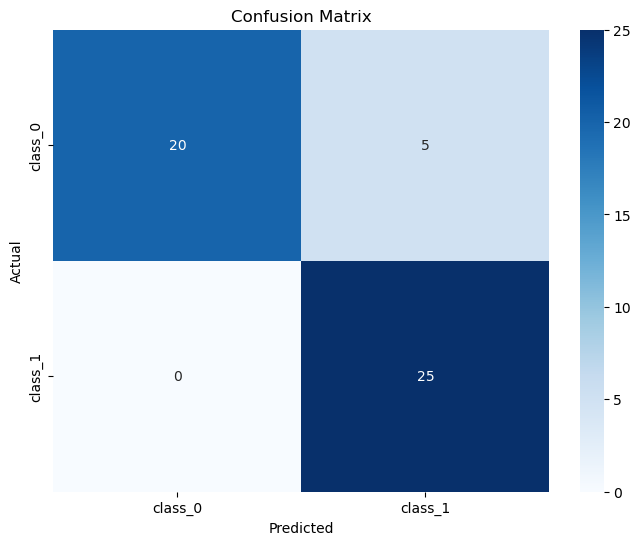

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the evaluation dataset
predictions = trainer.predict(tokenized_test_dataset)
preds = np.argmax(predictions.predictions, axis=1)
labels = predictions.label_ids

# Plot Confusion Matrix
cm = confusion_matrix(labels, preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Function to compute accuracy and F1 score
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='macro')
    return {'accuracy': accuracy, 'f1': f1}

# Update Trainer with compute_metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics  # Compute accuracy and F1 score
)

# Re-run evaluation to get updated metrics
eval_results = trainer.evaluate(eval_dataset=tokenized_test_dataset)
print(f"Evaluation results: {eval_results}")

Evaluation results: {'eval_loss': 0.5510217547416687, 'eval_accuracy': 0.9, 'eval_f1': 0.898989898989899, 'eval_runtime': 114.4996, 'eval_samples_per_second': 0.437, 'eval_steps_per_second': 0.061}


In [ ]:
# Evaluate on the training dataset as well
train_results = trainer.evaluate(eval_dataset=tokenized_datasets['train'])
print(f"Training results: {train_results}")


In [ ]:
# Plot training loss
training_loss = trainer.state.log_history

# Extract loss values and steps
loss_values = [log["loss"] for log in training_loss if "loss" in log]
steps = [log["step"] for log in training_loss if "step" in log]

plt.figure(figsize=(10, 6))
plt.plot(steps, loss_values, label="Training Loss")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.legend()
plt.show()


In [ ]:
import json

# Save training metrics
train_metrics = trainer.state.log_history  # Contains loss, learning rate, and other logs

# Save the metrics to a file
metrics_file = "./trained_model/training_metrics.json"
with open(metrics_file, "w") as f:
    json.dump(train_metrics, f)

print(f"Training metrics saved to {metrics_file}")


Training metrics saved to ./trained_model/training_metrics.json


In [ ]:
# Evaluate the model
eval_results = trainer.evaluate(eval_dataset=tokenized_test_dataset)

# Save the evaluation results to a file
eval_results_file = "./trained_model/eval_results.json"
with open(eval_results_file, "w") as f:
    json.dump(eval_results, f)

print(f"Evaluation results saved to {eval_results_file}")


Evaluation results saved to ./trained_model/eval_results.json
